**Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! mkdir upim

In [ ]:
! unzip '/content/drive/MyDrive/ESCDATASETZip.zip' -d upim

Archive:  /content/drive/MyDrive/ESCDATASETZip.zip
  inflating: upim/ESCDATASET/cluster1.tif  
  inflating: upim/ESCDATASET/cluster10.tif  
  inflating: upim/ESCDATASET/cluster11.tif  
  inflating: upim/ESCDATASET/cluster12.tif  
  inflating: upim/ESCDATASET/cluster13.tif  
  inflating: upim/ESCDATASET/cluster14.tif  
  inflating: upim/ESCDATASET/cluster15.tif  
  inflating: upim/ESCDATASET/cluster16.tif  
  inflating: upim/ESCDATASET/cluster17.tif  
  inflating: upim/ESCDATASET/cluster18.tif  
  inflating: upim/ESCDATASET/cluster19.tif  
  inflating: upim/ESCDATASET/cluster2.tif  
  inflating: upim/ESCDATASET/cluster20.tif  
  inflating: upim/ESCDATASET/cluster21.tif  
  inflating: upim/ESCDATASET/cluster22.tif  
  inflating: upim/ESCDATASET/cluster23.tif  
  inflating: upim/ESCDATASET/cluster24.tif  
  inflating: upim/ESCDATASET/cluster25.tif  
  inflating: upim/ESCDATASET/cluster26.tif  
  inflating: upim/ESCDATASET/cluster27.tif  
  inflating: upim/ESCDATASET/cluster28.tif  
  infl

In [ ]:
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import tensorflow.compat.v2 as tf
import keras
import cv2
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from numpy import asarray


**Plotting the images and checking the shapes**

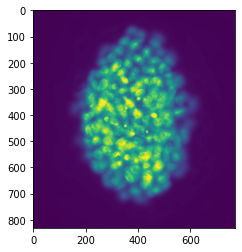

(831, 771)


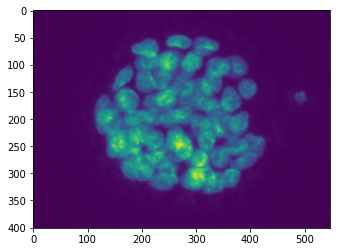

(401, 547)


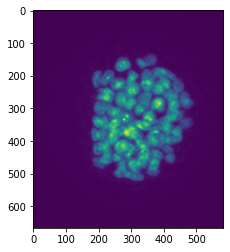

(666, 582)


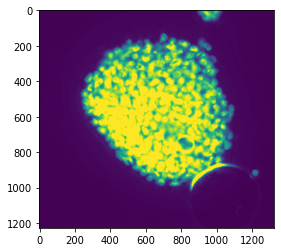

(1227, 1326)


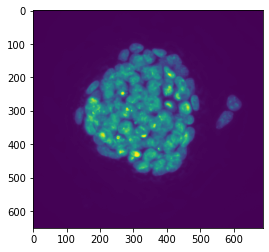

(651, 687)


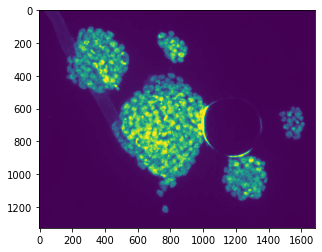

(1329, 1683)


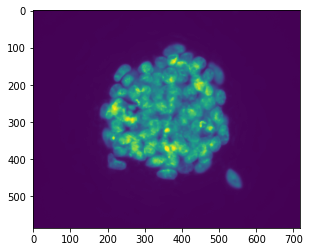

(585, 717)


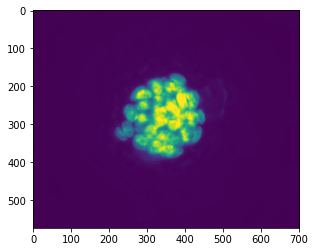

(573, 702)


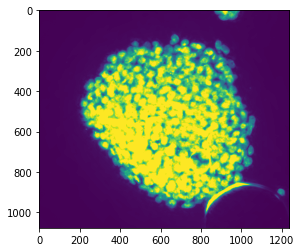

(1077, 1239)


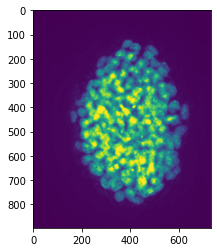

(897, 732)


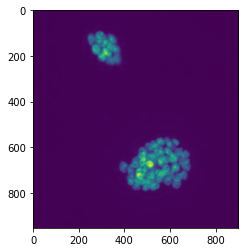

(954, 900)


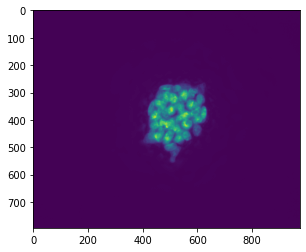

(795, 975)


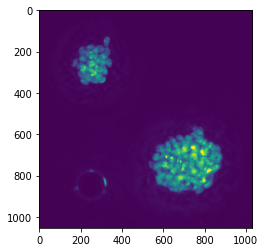

(1053, 1032)


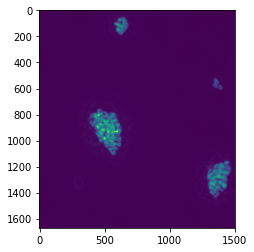

(1671, 1506)


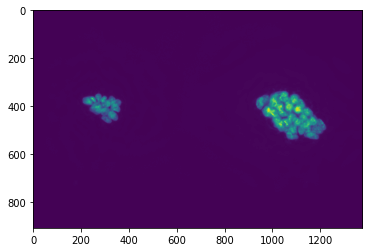

(909, 1377)


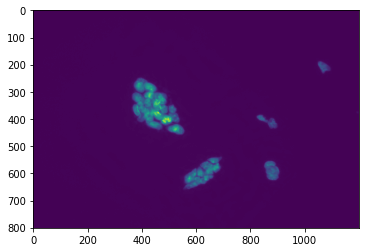

(801, 1200)


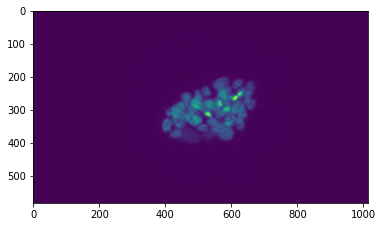

(582, 1014)


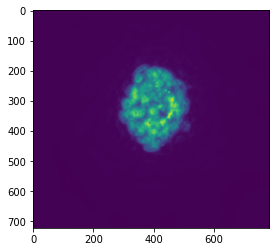

(723, 786)


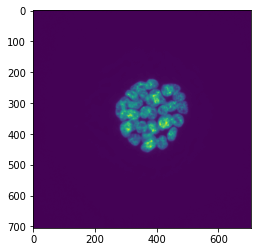

(705, 705)


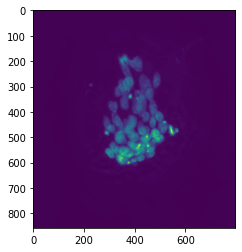

(858, 798)


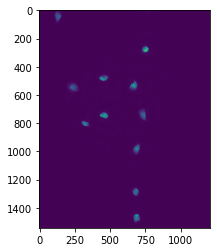

(1542, 1212)


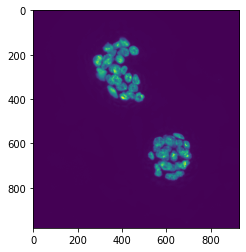

(981, 930)


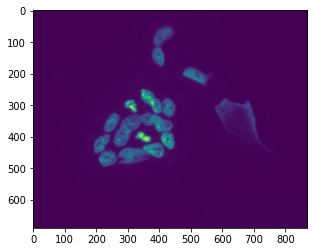

(690, 870)


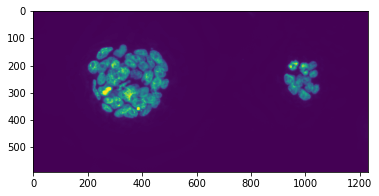

(591, 1230)


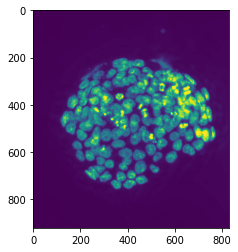

(921, 828)


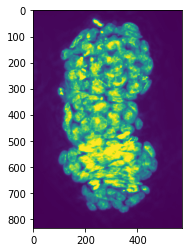

(834, 570)


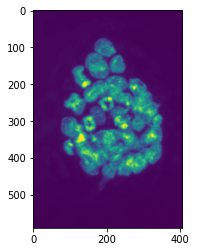

(591, 405)


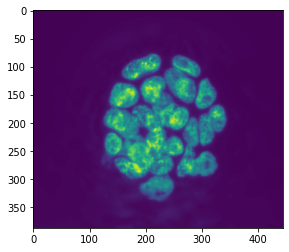

(387, 444)


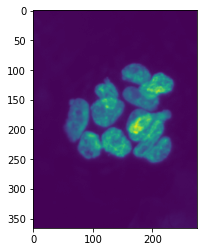

(366, 276)


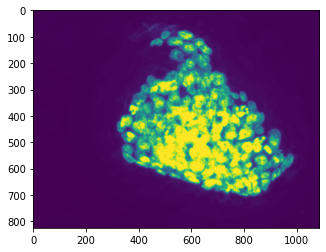

(825, 1086)


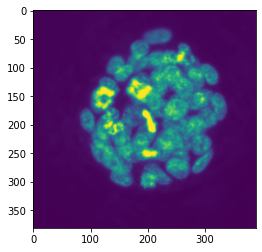

(381, 390)


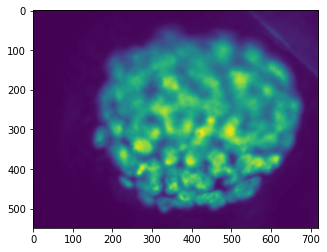

(549, 720)


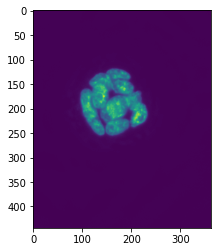

(444, 363)


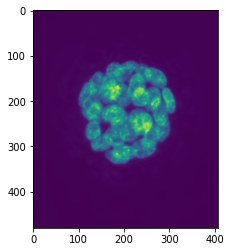

(480, 408)


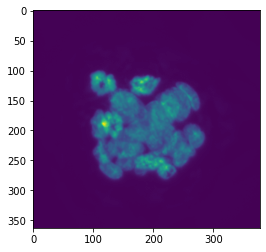

(363, 378)


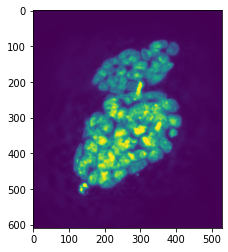

(609, 528)


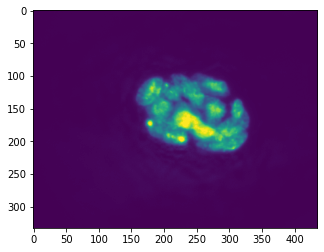

(333, 435)


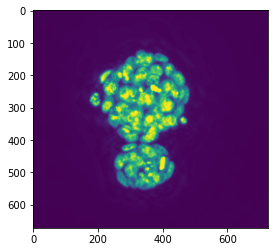

(672, 726)


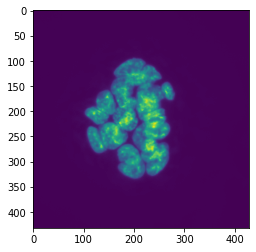

(432, 429)


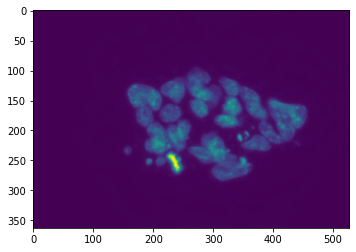

(363, 528)


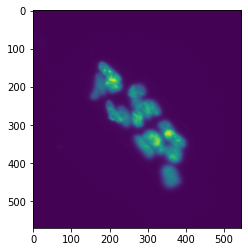

(570, 546)


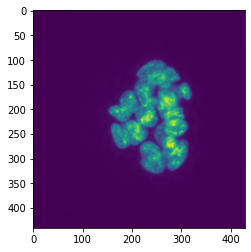

(441, 429)


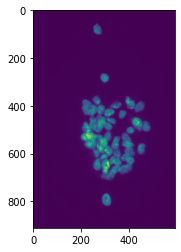

(912, 594)


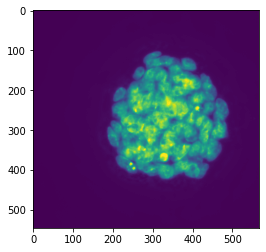

(546, 567)


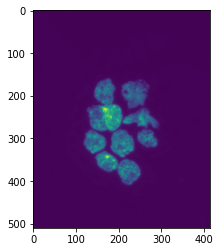

(510, 414)


In [ ]:
PATH = '/content/upim/ESCDATASET/cluster{}.tif'
for i in range(1,46):
  path = PATH.format(i)
  img = Image.open(path)
  npdata = asarray(img)
  plt.imshow(npdata)
  plt.show()
  print(npdata.shape)

In [ ]:
! mkdir primages
! mkdir prim


**All the images are re-sized to 600x600 for ease of running the clustering algorithms**

In [ ]:
for i in range(1,46):
  path = PATH.format(i)
  img = Image.open(path)
  img= img.resize((600,600))
  img.save(PATH.format(i))
  

**Plotting the re-sized images**

float32


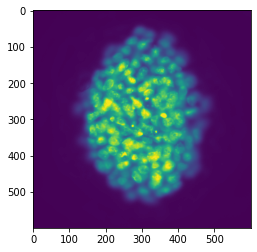

float32


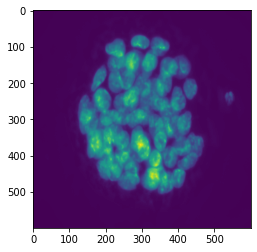

float32


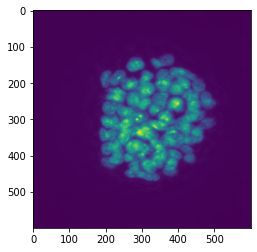

float32


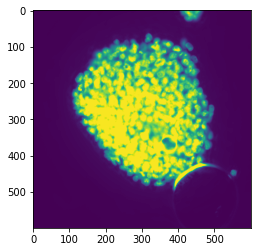

float32


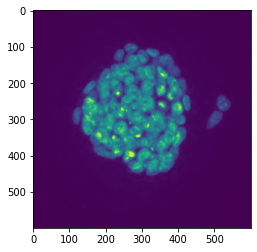

float32


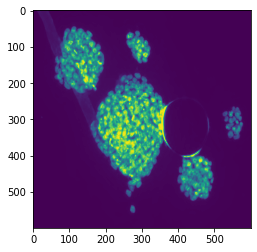

float32


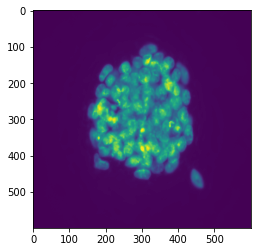

float32


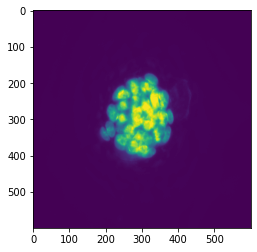

float32


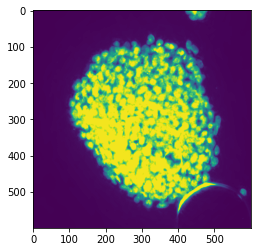

float32


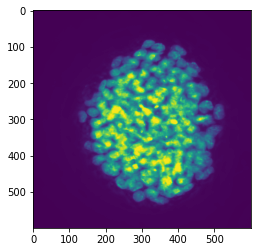

float32


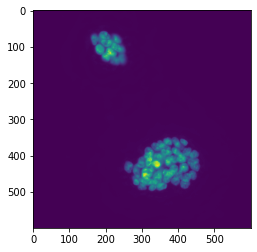

float32


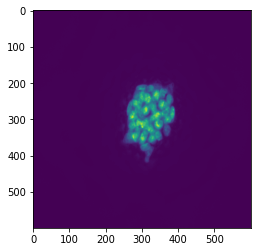

float32


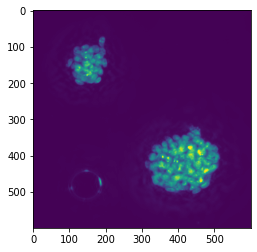

float32


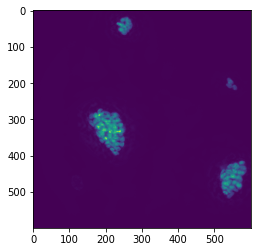

float32


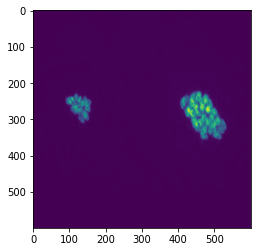

float32


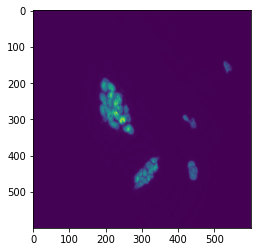

float32


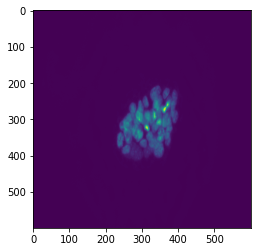

float32


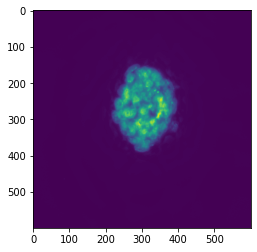

float32


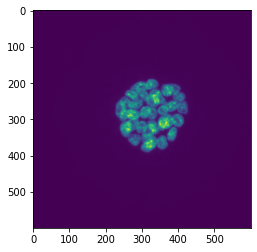

float32


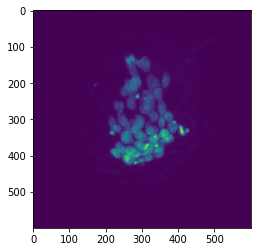

float32


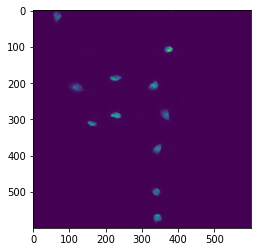

float32


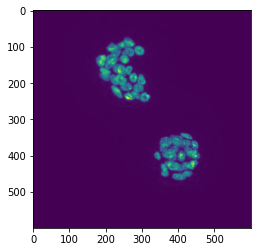

float32


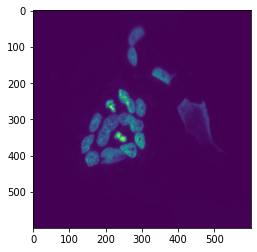

float32


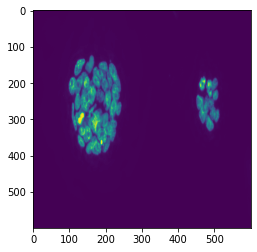

float32


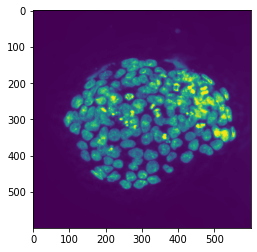

float32


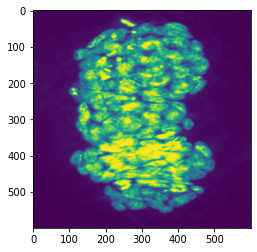

float32


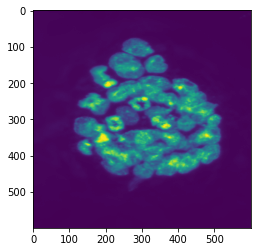

float32


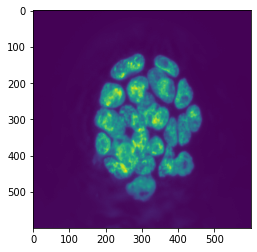

float32


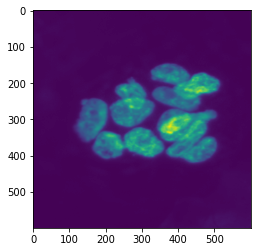

float32


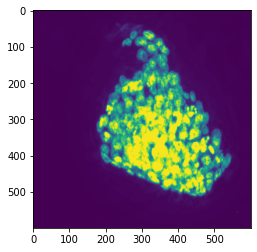

float32


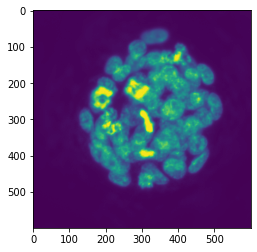

float32


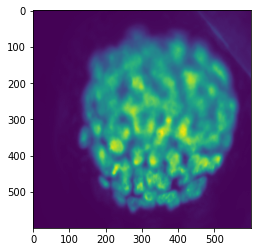

float32


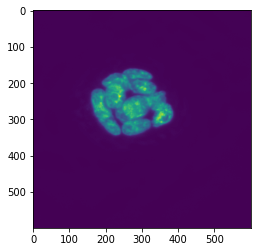

float32


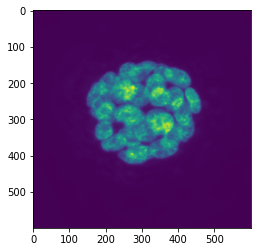

float32


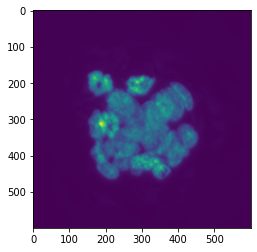

float32


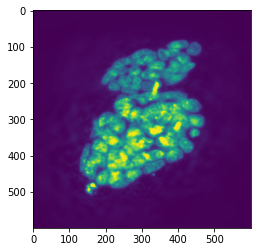

float32


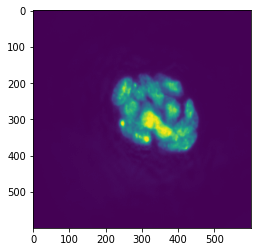

float32


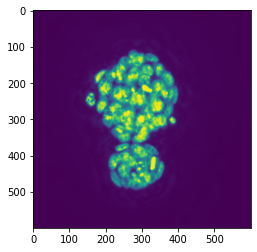

float32


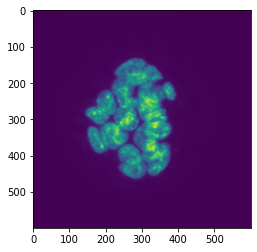

float32


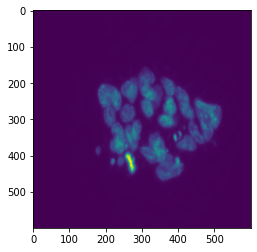

float32


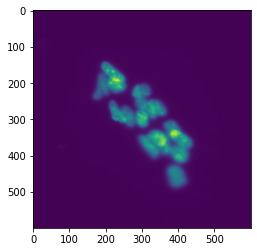

float32


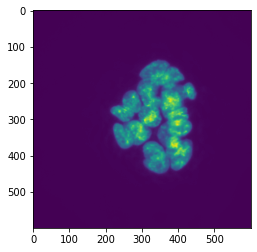

float32


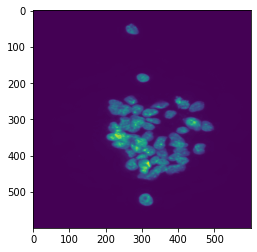

float32


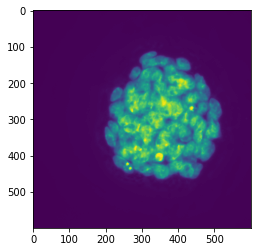

float32


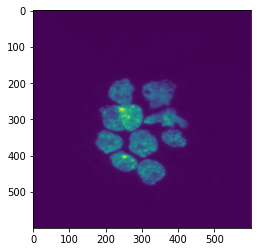

In [ ]:
PATH = '/content/upim/ESCDATASET/cluster{}.tif'
for i in range(1,46):
  path = PATH.format(i)
  img = Image.open(path)
  npdata = asarray(img)
  plt.imshow(npdata)
  print(npdata.dtype)
  plt.show()

**The images are stored into a 3-D array(an array containing the 2-D images)**

In [ ]:
data = []
dataNum = []
label = []
PATH1 = '/content/upim/ESCDATASET/'
for file in os.listdir(PATH1):
  img = Image.open(PATH1+file)
  dt = asarray(img)
  data.append(img)
  dataNum.append(dt)
data = np.array(data)
dataNum = np.array(dataNum)
#plt.imshow(dataNum[0])
print('Shape of dataset is: ', end='')
print(dataNum.shape)

Shape of dataset is: (45, 600, 600)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The input object of type 'TiffImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'TiffImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


**Each image is flattened from a 2-D matrix to a 1-D vector for running k-means clustering**

In [ ]:
dataNum = dataNum/np.max(dataNum)
reshaped_data = dataNum.reshape(len(dataNum),-1)
reshaped_data.shape

(45, 360000)

**Vanilla k-means clustering: without any other learning algorithms**

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
clusters_vanilla = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

(4, 360000)

The following array represents the classes of each of the 45 images in order

In [ ]:
clusters_vanilla

array([0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       0, 3, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 3, 2, 1,
       0], dtype=int32)

Making a dictionary containing the classes and each class containing the images belonging to it

In [ ]:
cl_img = {0:[], 1:[], 2:[], 3:[]}

In [ ]:
for i in range(45):
  cl_img[clusters_vanilla[i]].append(i+1)

In [ ]:
cl_img

{0: [1,
  2,
  4,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  19,
  22,
  23,
  26,
  27,
  32,
  34,
  35,
  37,
  38,
  39,
  41,
  45],
 1: [7, 20, 21, 25, 29, 36, 44],
 2: [3, 5, 6, 9, 16, 17, 18, 28, 30, 31, 33, 43],
 3: [24, 40, 42]}

The images in each of the classes are plotted below

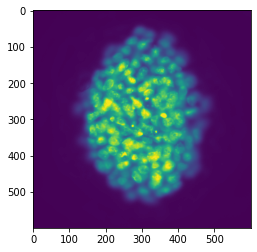

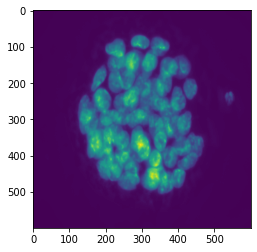

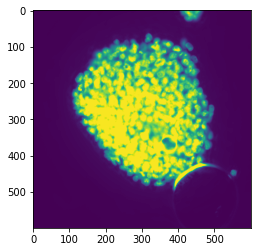

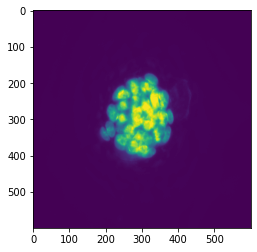

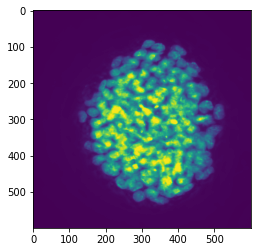

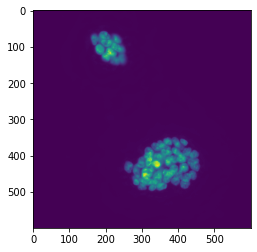

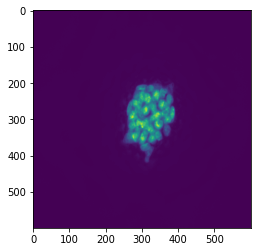

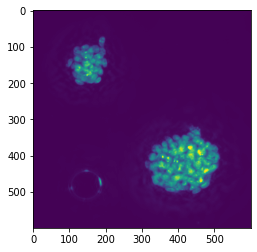

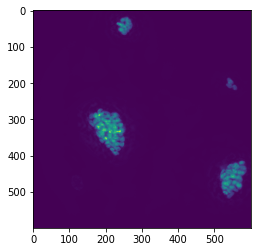

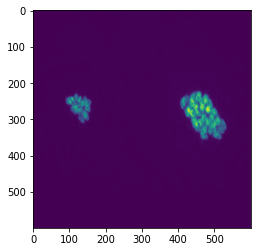

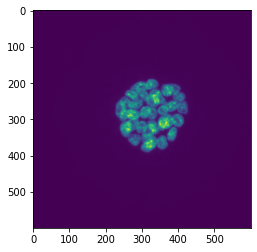

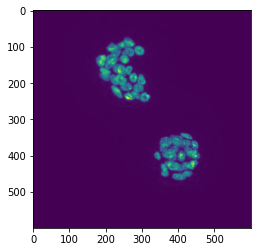

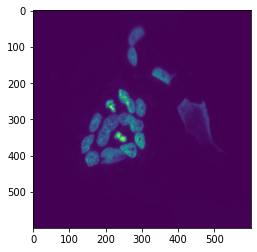

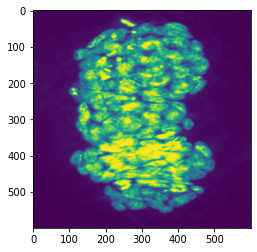

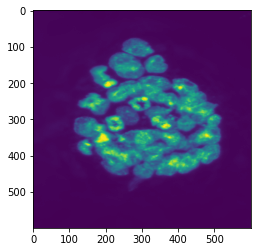

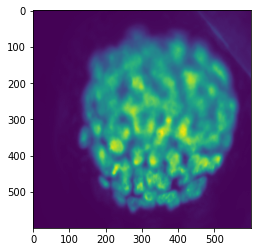

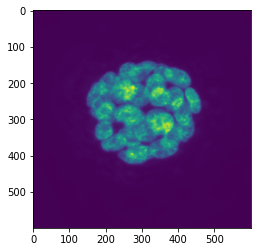

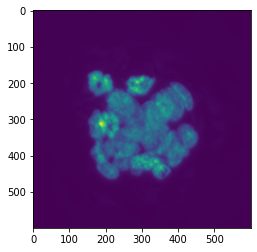

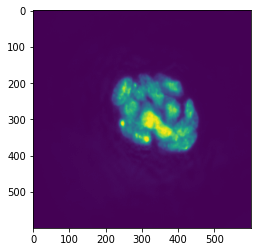

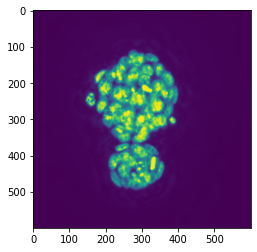

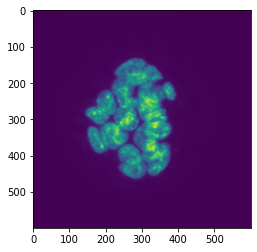

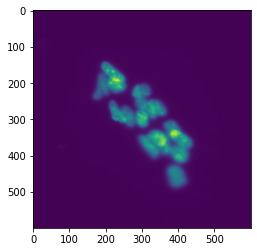

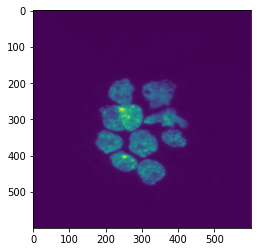

In [ ]:
for i in cl_img[0]:
  path = '/content/upim/ESCDATASET/cluster{}.tif'.format(i)
  img = Image.open(path)
  npdt = asarray(img)
  plt.imshow(npdt)
  plt.show()

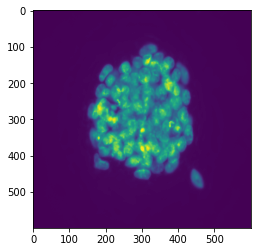

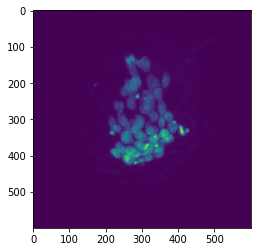

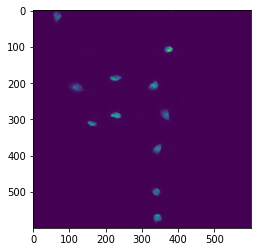

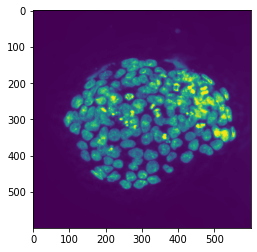

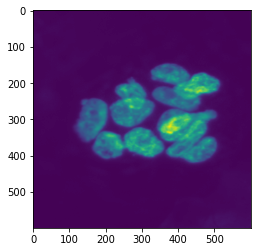

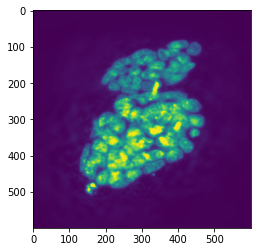

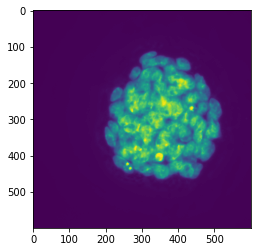

In [ ]:
for i in cl_img[1]:
  path = '/content/upim/ESCDATASET/cluster{}.tif'.format(i)
  img = Image.open(path)
  npdt = asarray(img)
  plt.imshow(npdt)
  plt.show()

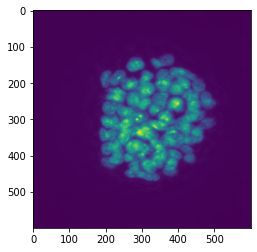

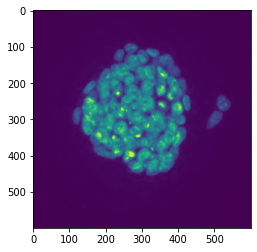

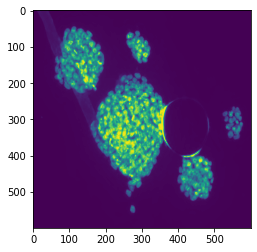

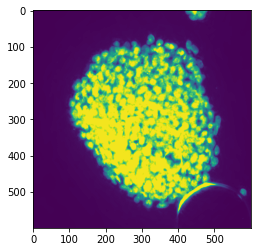

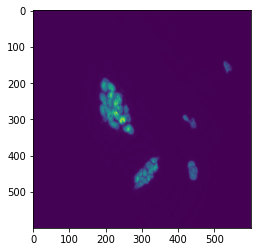

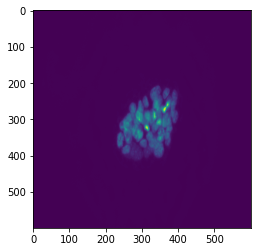

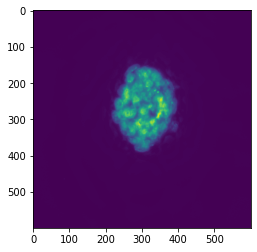

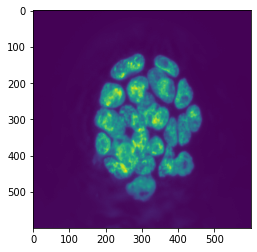

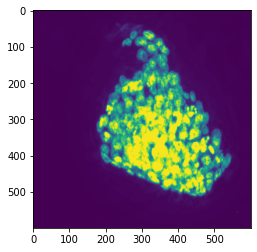

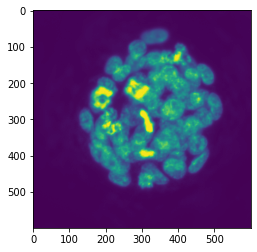

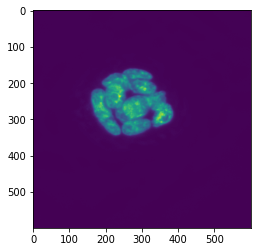

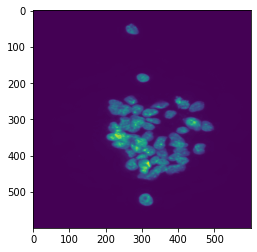

In [ ]:
for i in cl_img[2]:
  path = '/content/upim/ESCDATASET/cluster{}.tif'.format(i)
  img = Image.open(path)
  npdt = asarray(img)
  plt.imshow(npdt)
  plt.show()

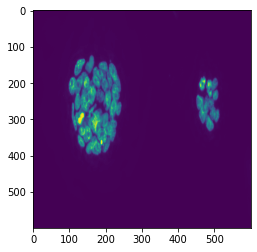

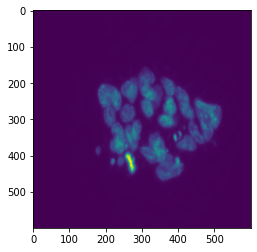

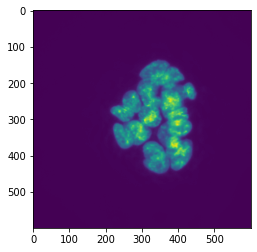

In [ ]:
for i in cl_img[3]:
  path = '/content/upim/ESCDATASET/cluster{}.tif'.format(i)
  img = Image.open(path)
  npdt = asarray(img)
  plt.imshow(npdt)
  plt.show()

In [ ]:
! mkdir vanillakmeans_class0
! mkdir vanillakmeans_class1
! mkdir vanillakmeans_class2
! mkdir vanillakmeans_class3


In [ ]:
path_to_vanilla = '/content/vanillakmeans_class{}/'

In [ ]:
for cls in cl_img:
  for j in cl_img[cls]:
    path = path_to_vanilla.format(cls)
    file_name = 'cluster{}.tif'.format(j)
    img = Image.open('/content/upim/ESCDATASET/cluster{}.tif'.format(j))
    img.save(path + file_name)


The images are clustered into 4 classes. By visual inspection, the stem cells seem to be one of the following: compact(1 lobe), bilobed, multilobed and scattered. Hence, 4 classes are constructed.

However, performance of k-means with raw pixel values seem to be very poor as very similar images have been classified into different classes

**Vanilla k-means with variable no of clusters**

Silhouette score is the metric chosen for evaluating the performance of the clustering

In [ ]:
sklearn.metrics.silhouette_score(reshaped_data, clusters_vanilla )

0.23348351

In [ ]:
for i in range(2,10):
  kmeans1 = KMeans(n_clusters=i)
  clusters_vanilla1 = kmeans1.fit_predict(reshaped_data)
  acc = sklearn.metrics.silhouette_score(reshaped_data, clusters_vanilla1)
  print(acc) #score for n=2 is found to be highest, indicating that it is the optimum no of clusters



0.40365672
0.25838256
0.2511138
0.24624172
0.25340566
0.23944052
0.13606843
0.21967979


Clustering with 2 clusters

In [ ]:
km = KMeans(n_clusters = 2)
cl_vn = km.fit_predict(reshaped_data)
cl_vn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0], dtype=int32)

Dictionary containing the custered images into 2 classes is shown below

In [ ]:
clustered_imdict = {0:[], 1:[]}
for i in range(45):
  clustered_imdict[cl_vn[i]].append(i)
clustered_imdict

{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  21,
  22,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  40,
  42,
  44],
 1: [19, 20, 23, 24, 28, 39, 41, 43]}

In [ ]:
sklearn.metrics.silhouette_score(reshaped_data, cl_vn )

0.42477304

Clustering with 2 clusters gives higest Silhoutte score, so the image set has been clustered into 2 for best accuracy

**k-means with transfer learning**

In [ ]:
from keras import backend
from keras.applications import imagenet_utils
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import keras

A CNN of type ResNet50(with pre-trained weights) is selected for extracting features to be fed into the k-means algorithm, since we get better and more important features in this way, rather than using the raw pixel values directly

In [ ]:
IMG_SIZE = 600
model =   keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE,3))

94765736/94765736 [==============================] - 1s 0us/step


Each entry of the blach n white (2D) image is copied 3 times to make a pseudo RGB image, which is fed to the ResNet

In [ ]:
pRGBdata = np.repeat(dataNum[:, :, :,np.newaxis], 3, axis=3)
pRGBdata.shape

(45, 600, 600, 3)

The features from the image are extracted through the ResNet model by the following function

In [ ]:
def extract_vector(data_holder):

    resnet_feature_list = []

    for im in data_holder: 

        img = preprocess_input(np.expand_dims(im.copy(), axis=0))

        resnet_feature = model.predict(img)

        resnet_feature_np = np.array(resnet_feature)

        resnet_feature_list.append(resnet_feature_np.flatten())
    return np.array(resnet_feature_list)

Now the extracted features are fed into kmeans algorithms with 4 clusters (preliminary assumption from inspection)

In [ ]:
array = extract_vector(pRGBdata)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters1 = kmeans.fit_predict(array)

1/1 [==============================] - 0s 23ms/step


The cluster no corresponding to each image is as follows

In [ ]:
clusters1

array([0, 0, 2, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0], dtype=int32)

Dictionary is constructed having the images corresponding to each class

In [ ]:
clust_im_dict = {0:[], 1:[], 2:[], 3:[]}
for i in range(45):
  clust_im_dict[clusters1[i]].append(i+1)
clust_im_dict

{0: [1,
  2,
  4,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  22,
  23,
  26,
  27,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  41,
  43,
  44,
  45],
 1: [24, 40],
 2: [3, 6, 7, 18, 20, 21, 25, 28, 29, 42],
 3: [5]}

Accuracy metric (silhouette score)

In [ ]:
sklearn.metrics.silhouette_score(reshaped_data, clusters1 )

0.26571232

**With variable cluster size, to determine the most optimal number of clusters**

In [ ]:
accuracy_scores = {}
for i in range(2,6):
  array1 = extract_vector(pRGBdata)
  kmeans1 = KMeans(n_clusters=i, random_state=0)
  clusters11 = kmeans1.fit_predict(array)
  accuracy_scores[i]=sklearn.metrics.silhouette_score(reshaped_data, clusters11)

#accuracy_scores                                                     


1/1 [==============================] - 0s 22ms/step


In [ ]:
accuracy_scores

{2: 0.3766306, 3: 0.24887824, 4: 0.26571232, 5: 0.21382022}

**k-means clustering + ConvNet with no of clust = 2**

In [ ]:
array = extract_vector(pRGBdata)
kmeans2 = KMeans(n_clusters=2, random_state=0)
clusters2 = kmeans2.fit_predict(array)

1/1 [==============================] - 0s 25ms/step


The following dictionary contains the classes corresponding to each image resulting from the 2-class clustering

In [ ]:
clust_im_dict2 = {0:[], 1:[]}
for i in range(45):
  clust_im_dict2[clusters2[i]].append(i+1)
clust_im_dict2

{0: [1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  26,
  27,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  41,
  43,
  44,
  45],
 1: [6, 24, 25, 28, 29, 40, 42]}

**Thus, though visual inspection suggest 3/4 classes, based on Silhouette coefficient, 2 clustering seems to be best choice**